In [1]:
# pip install descartes
!pip install pyplutchik emoji contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 75.5 MB/s eta 0:00:00


In [2]:
# !ls /usr/lib/python3.9	

!ls /usr/local/lib/python3.9/dist-packages/descartes


__init__.py  __pycache__  patch.py  tests.py


In [3]:
!sed -i '62,65c\    vertices = concatenate([\n        concatenate([asarray(t.exterior.coords)[:, :2]] +\n                    [asarray(r)[:, :2] for r in t.interiors])\n        for t in polygon])' /usr/local/lib/python3.9/dist-packages/descartes/patch.py

In [4]:
cat /usr/local/lib/python3.9/dist-packages/descartes/patch.py

"""Paths and patches"""

from matplotlib.patches import PathPatch
from matplotlib.path import Path
from numpy import asarray, concatenate, ones


class Polygon(object):
    # Adapt Shapely or GeoJSON/geo_interface polygons to a common interface
    def __init__(self, context):
        if isinstance(context, dict):
            self.context = context['coordinates']
        else:
            self.context = context

    @property
    def exterior(self):
        return (getattr(self.context, 'exterior', None)
                or self.context[0])

    @property
    def interiors(self):
        value = getattr(self.context, 'interiors', None)
        if value is None:
            value = self.context[1:]
        return value


def PolygonPath(polygon):
    """Constructs a compound matplotlib path from a Shapely or GeoJSON-like
    geometric object"""

    def coding(ob):
        # The codes will be all "LINETO" commands, except for "MOVETO"s at the
        # beginning of each subpath
        n

In [5]:
import re
import nltk
import emoji
import csv
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from modules.Preprocessing import preprocess_text, tokenize
from modules.FeatureExtraction import *
from modules.EmotionModel import *
from torch import cuda
from transformers import DistilBertTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

tokenizer = DistilBertTokenizer.from_pretrained('models/vocab_distilbert_emotions.bin')
model_path = 'models/distilbert_emotions.bin' 
model = DistilBERTClass()  # Create an empty DistilBERT model
model = torch.load(model_path)
model.to(device)
model.eval()

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenc

DistilBERTClass(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_featu

{'anger': 0.22691798, 'anticipation': 0.113130204, 'disgust': 0.30116662, 'fear': 0.3821964, 'joy': 0.068568155, 'sadness': 0.24786687, 'surprise': 0.12901334, 'trust': 0.018114539}
Tweet:  ew freak


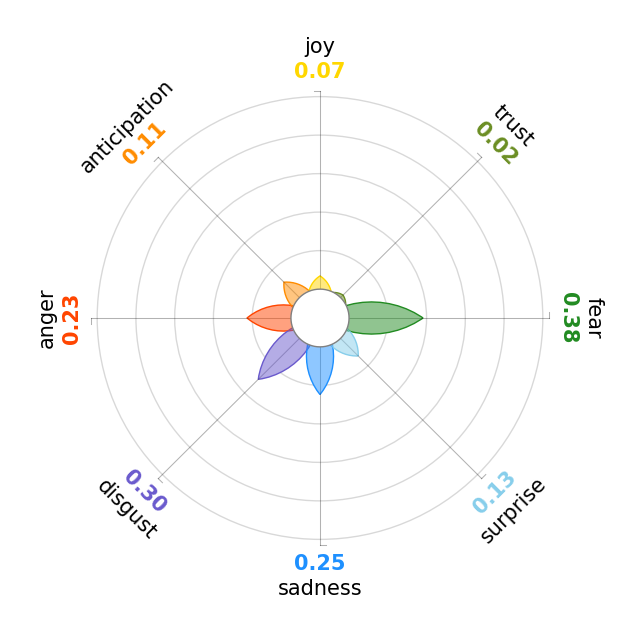

In [12]:
# Single tweet example
tweet = "Ew, such a freak"
inputs = preprocess_text(tweet)
tokens = tokenize(inputs)
tweet = ' '.join(tokens)
clean_tweet = tweet

#creating a dataframe
df_single = create_dataframe_for_tweet(clean_tweet)
new_df_single = create_new_dataframe(df_single)
new_set = MultiLabelDataset(new_df_single, tokenizer, 128)
new_params = {'batch_size': 1,'shuffle': False,'num_workers': 0}
new_loader = DataLoader(new_set, **new_params)

#Getting probabilities
probabilities = evaluate_data_loader(new_loader,model)
arr = np.array(probabilities)
flattened_arr = arr.flatten()

#mapping out emotions to a graph
emo = Emotion(flattened_arr)
print(emo.emotions)
plutchik(emo.emotions)
print("Tweet: ", tweet)
